# Analyse du jeu de données "Gapminder" avec pandas

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Chargement

In [30]:
# Charger le jeu de données gapminder, édité avec des valeurs manquantes et des duplications
df = pd.read_csv('data/gapminder_edited.csv')
df = pd.read_csv('data/gapminder.csv')

In [45]:
# Charger le jeu de données gapminder, édité avec des valeurs manquantes et des duplications
df = pd.read_csv('data/titanic.csv')

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


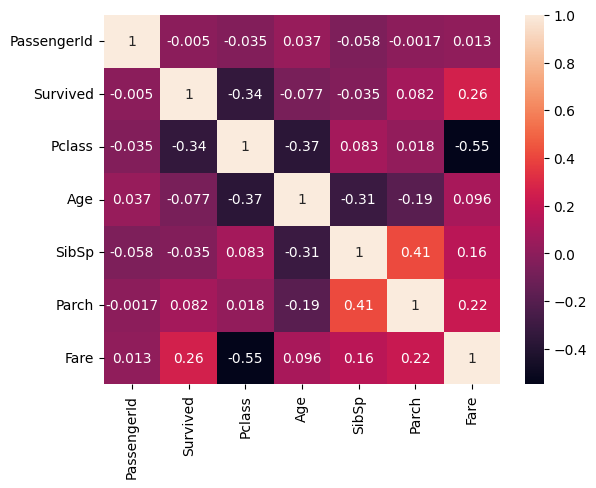

In [48]:
quantitative_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

corr_matrix = df[quantitative_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

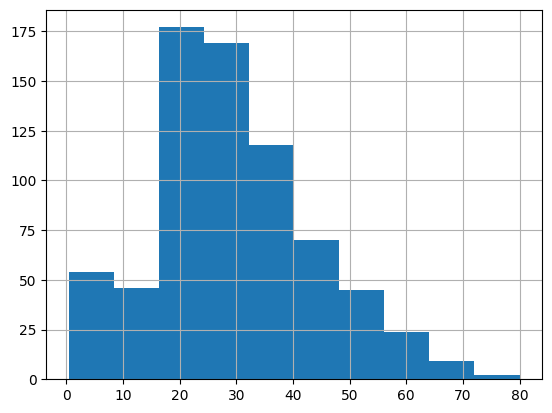

In [14]:
df['Age'].hist()

<Axes: >

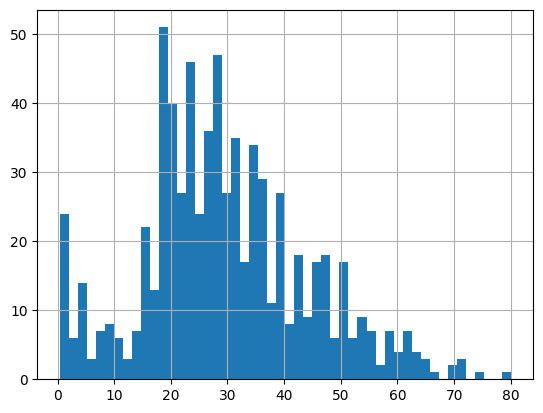

In [15]:
df['Age'].hist(bins=50)

In [16]:
df[df['Age'] > 30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [19]:
filtered_df = df[df['Age'] > 30]

In [20]:
filtered_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

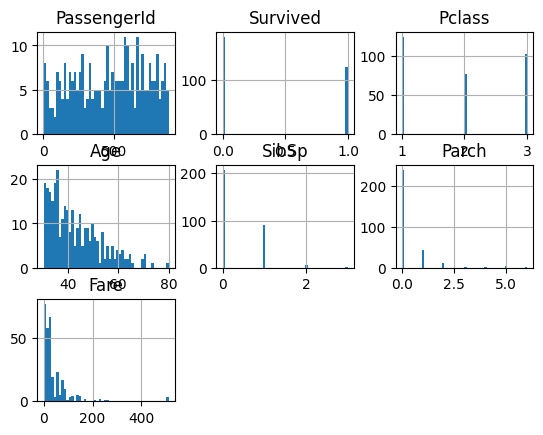

In [22]:
filtered_df.hist(bins=50)

<Axes: >

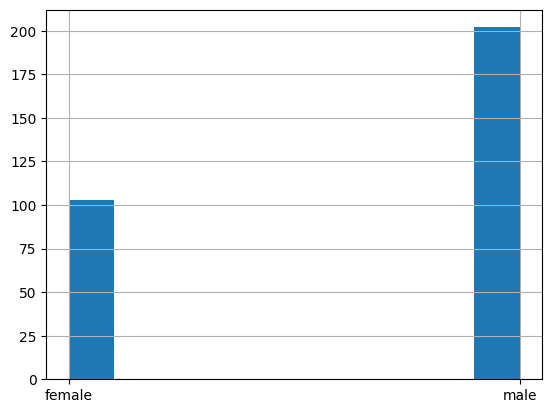

In [26]:
filtered_df['Sex'].hist()

In [5]:
df.shape

(1712, 8)

In [6]:
df.sample(5)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1679,Burundi,Africa,1957.0,40.533,2667518.0,379.564628,BDI,108.0
437,El Salvador,Americas,1967.0,55.855,3232927.0,4358.595393,SLV,222.0
644,Syria,Asia,1987.0,66.974,11242847.0,3116.774285,SYR,760.0
1046,Botswana,Africa,1987.0,63.622,1151184.0,6205.883850,BWA,72.0
348,Spain,Europe,1952.0,64.940,28549870.0,3834.034742,ESP,724.0


In [7]:
import json

# Load the raw JSON data
with open('data/parking.json') as f:
    data = json.load(f)

# Extract the 'features' and convert to DataFrame
df_parkings = pd.json_normalize(data['features'])

# Show the first few rows
df_parkings.head()


,type,id,geometry_name,geometry.type,geometry.coordinates,properties.objectid,properties.id,properties.nom,properties.adresse,properties.ville,properties.code_insee,properties.etat,properties.txt_aff,properties.nbr_total,properties.nbr_libre,properties.dtdate,properties.longitude,properties.latitude
0,Feature,parking.1,geom,Point,"[704445.415162, 7059340.511054]",1,LIL0001,République,Place de la République,LILLE,59350,OUVERT,145,310,146,2024-12-09T13:54:00Z,3.062724,50.631027
1,Feature,parking.2,geom,Point,"[704133.963794, 7059796.512165]",2,LIL0002,Plaza,Rue Nationale,LILLE,59350,OUVERT,50,323,50,2024-12-09T13:54:00Z,3.058334,50.635122
2,Feature,parking.3,geom,Point,"[704764.808825, 7059700.637336]",3,LIL0003,Tanneurs,Rue du Molinel,LILLE,59350,OUVERT,270,563,270,2024-12-09T13:54:00Z,3.067235,50.634257
3,Feature,parking.4,geom,Point,"[705570.611236, 7059392.022501]",4,LIL0004,Grand Palais,Boulevard des Citées Unies,LILLE,59350,OUVERT,1020,1182,1024,2024-12-09T13:54:00Z,3.078601,50.631481
4,Feature,parking.5,geom,Point,"[705133.104323, 7059765.537221]",5,LIL0005,Lille Flandres,Rue de Tournai,LILLE,59350,OUVERT,40,374,42,2024-12-09T13:54:00Z,3.072433,50.634836


# Nettoyage


In [8]:
# display duplicate rows
df[df.duplicated()]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
270,Hungary,Europe,1957.0,66.410,9839000.0,6040.180011,HUN,348.0
845,Colombia,Americas,1967.0,59.963,19764027.0,2678.729839,COL,170.0
850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
895,Belgium,Europe,1992.0,76.460,10045622.0,25575.570690,BEL,56.0
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183,Saudi Arabia,Asia,1967.0,49.901,5618198.0,16903.048860,SAU,682.0
1320,Honduras,Americas,1967.0,50.924,2500689.0,2538.269358,HND,340.0


In [9]:
# Supprimer les doublons
df = df.drop_duplicates()

In [10]:
# Afficher les lignes avec des valeurs manquantes
df[df.isnull().any(axis=1)]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
128,NaN,Africa,1982.0,58.161,31140029.0,8568.266228,ZAF,710.0
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,West Bank and Gaza,Asia,1977.0,60.765,NaN,3682.831494,PSE,275.0
569,"Hong Kong, China",Asia,NaN,73.600,4583700.0,11186.141250,HKG,344.0
1348,Japan,Asia,1967.0,71.430,100825279.0,9847.788607,JPN,NaN
1638,Cameroon,Africa,1957.0,40.428,5359923.0,1313.048099,NaN,120.0


In [11]:
print(f'Nombre de lignes du dataframe avant suppression des valeurs manquantes : {df.shape[0]}')
df.dropna(inplace=True,)
print(f'Nombre de lignes du dataframe après suppression des valeurs manquantes : {df.shape[0]}')

Nombre de lignes du dataframe avant suppression des valeurs manquantes : 1705
Nombre de lignes du dataframe après suppression des valeurs manquantes : 1699


In [12]:
# renvoyer les lignes où une colonne spécifique a une valeur manquante
df_pop_missing = df[df['pop'].isnull()]
df_pop_missing

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num


In [13]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne 'pop'

print(f'Nombre de lignes avant suppression des valeurs manquantes: {df.shape[0]}')
df = df.dropna(subset=['pop'], axis=0)
print(f'Nombre de lignes après suppression des valeurs manquantes: {df.shape[0]}')

Nombre de lignes avant suppression des valeurs manquantes: 1699
Nombre de lignes après suppression des valeurs manquantes: 1699


In [14]:
# .all() pour renvoyer les lignes où toutes les colonnes ont des valeurs manquantes
df_all_missing = df[df.isnull().all(axis=1)]

# .sum() pour renvoyer les lignes avec au moins une valeur manquante
df_at_least_one_missing = df[df.isnull().sum(axis=1) > 0]

# .sum() pour renvoyer les lignes avec exact
df_exactly_two_missing = df[df.isnull().sum(axis=1) == 2]

# .notnull().all() pour renvoyer les lignes où toutes les colonnes ont des valeurs non manquantes
df_all_non_missing = df[df.notnull().all(axis=1)]

# .notnull().any() pour renvoyer les lignes où au moins une colonne a une valeur non manquante
df_at_least_one_non_missing = df[df.notnull().any(axis=1)]

# Statistiques descriptives


In [15]:
# Charger le jeu de données original:
df = pd.read_csv('data/gapminder.csv')

![image.png](images/mean_std.png)

In [16]:
# Calculer des mesures de tendance centrale et de dispersion
print("Statistiques descriptives :")
df.describe()

Statistiques descriptives :


,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


<Axes: >

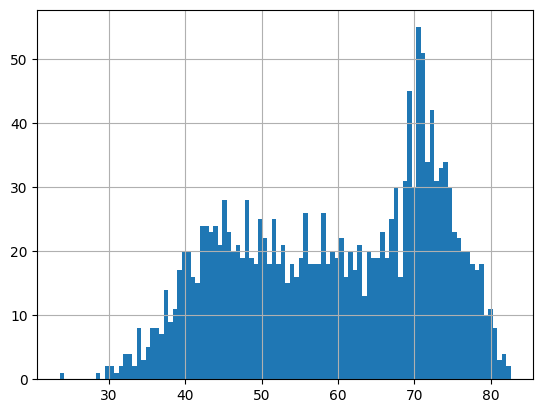

In [17]:
df['lifeExp'].hist(bins=100)

In [18]:
df['lifeExp'].mean()

np.float64(59.474439366197174)

In [19]:
df['lifeExp'].std()

np.float64(12.917107415241192)

# Sélection, filtrage et tri


In [20]:
# Exemple : Filtrage des données pour l'année 2007
filtered_df = df[df['year'] == 2007]
print("Données pour l'année 2007 :")
filtered_df

Données pour l'année 2007 :


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [21]:
# Ajout d'une condition: espérance de vie > 70
filtered_df = df[(df['year'] == 2007) & (df['lifeExp'] > 70)]
print("Pays avec une espérance de vie > 70 en 2007 :")
filtered_df

Pays avec une espérance de vie > 70 en 2007 :


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
71,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
...,...,...,...,...,...,...,...,...
1619,United States,Americas,2007,78.242,301139947,42951.653090,USA,840
1631,Uruguay,Americas,2007,76.384,3447496,10611.462990,URY,858
1643,Venezuela,Americas,2007,73.747,26084662,11415.805690,VEN,862
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704


In [22]:
# Triés par ordre décroissant de l'espérance de vie:
filtered_and_sorted_df = df[(df['lifeExp'] > 70) & (df['year'] == 2007)].sort_values(by='lifeExp', ascending=False)
print("Pays avec une espérance de vie > 70 en 2007, triés par ordre décroissant de l'espérance de vie :")
filtered_and_sorted_df

Pays avec une espérance de vie > 70 en 2007, triés par ordre décroissant de l'espérance de vie :


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
803,Japan,Asia,2007,82.603,127467972,31656.068060,JPN,392
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670,HKG,344
695,Iceland,Europe,2007,81.757,301931,36180.789190,ISL,352
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070,CHE,756
71,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36
...,...,...,...,...,...,...,...,...
731,Iran,Asia,2007,70.964,69453570,11605.714490,IRN,364
719,Indonesia,Asia,2007,70.650,223547000,3540.651564,IDN,360
1535,Thailand,Asia,2007,70.616,65068149,7458.396327,THA,764
611,Guatemala,Americas,2007,70.259,12572928,5186.050003,GTM,320


# Groupement / Aggrégation


![image-2.png](images/groupby.png)

In [23]:
# Espérance de vie moyenne par continent en 2007
grouped_data = df[df['year'] == 2007].groupby('continent')['lifeExp'].mean()
print("Espérance de vie moyenne par continent en 2007 :")
grouped_data

Espérance de vie moyenne par continent en 2007 :


continent
Africa      54.806038
Americas    73.608120
Asia        70.728485
Europe      77.648600
Oceania     80.719500
Name: lifeExp, dtype: float64

# Exploration et relations entre variables


Le coefficient de corrélation de Pearson et celui de Spearman sont deux mesures différentes de la corrélation entre deux variables, et ils sont adaptés à des types d'analyses distinctes.

## Coefficient de corrélation de Pearson
- Nature : Mesure linéaire.
- Utilisation : Évalue la force et la direction d'une relation linéaire entre deux variables quantitatives.
- Hypothèse : Suppose que les données sont normalement distribuées et que la relation entre les variables est linéaire.
- Valeur : Entre -1 (corrélation négative parfaite) et 1 (corrélation positive parfaite).
- Sensibilité : Très sensible aux valeurs aberrantes.

![image.png](images/pearson_example.png)

In [24]:
pearson_corr = df['gdpPercap'].corr(df['lifeExp'], method='pearson')
print(f"Coefficient de corrélation de Pearson entre PIB et espérance de vie : {pearson_corr:.2f}")

Coefficient de corrélation de Pearson entre PIB et espérance de vie : 0.58


- La relation entre le PIB et l'espérance de vie est modérément positive. Cela signifie qu'une augmentation du PIB est associée à une augmentation de l'espérance de vie, mais la relation n'est pas strictement linéaire.
  
- Limitation : 
  Cette valeur relativement basse (comparée à Spearman) indique que des variations ou des anomalies dans les données (par exemple, des pays avec un PIB élevé mais une faible espérance de vie) peuvent affaiblir la corrélation linéaire.

## Coefficient de corrélation de Spearman
- Nature : Basé sur les rangs.
- Utilisation : Mesure la force et la direction d'une relation monotone (croissante ou décroissante), qu'elle soit linéaire ou non.
- Hypothèse : Aucune hypothèse stricte sur la distribution ou la linéarité des données.
- Valeur : Entre -1 et 1, tout comme Pearson.
- Sensibilité : Moins sensible aux valeurs aberrantes car il utilise les rangs des données plutôt que leurs valeurs absolues.

In [25]:
# b) Corrélation de Spearman
spearman_corr = df['gdpPercap'].corr(df['lifeExp'], method='spearman')
print(f"Coefficient de corrélation de Spearman entre PIB et espérance de vie : {spearman_corr:.2f}")

Coefficient de corrélation de Spearman entre PIB et espérance de vie : 0.83


- La relation entre le PIB et l'espérance de vie est fortement monotone. Cela signifie que lorsque le PIB augmente, l'espérance de vie tend à augmenter également, même si la relation n'est pas nécessairement linéaire.

- Avantage de Spearman : En se basant sur les rangs (et non sur les valeurs exactes), ce coefficient est moins influencé par les valeurs aberrantes ou des cas particuliers.

## Interprétation globale

- **Non-linéarité :** Une différence importante entre les deux coefficients (comme ici) suggère que la relation entre le PIB et l'espérance de vie est probablement non-linéaire. Par exemple, une augmentation du PIB pourrait avoir un impact important sur l'espérance de vie dans les pays à faible PIB, mais un effet moins marqué dans les pays riches.

- **Impact des valeurs aberrantes :** Le coefficient de Pearson est probablement affecté par des valeurs extrêmes ou des outliers dans les données (comme des pays riches avec une faible espérance de vie ou vice-versa), tandis que Spearman capture mieux la tendance générale.


![image-2.png](images/pearson_spearman_comp.png)

## Matrice de corrélation

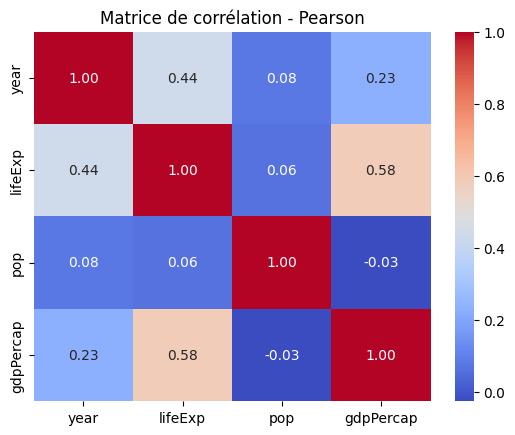

In [26]:
corr_matrix = df[['year', 'lifeExp', 'pop', 'gdpPercap']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation - Pearson")
plt.show()

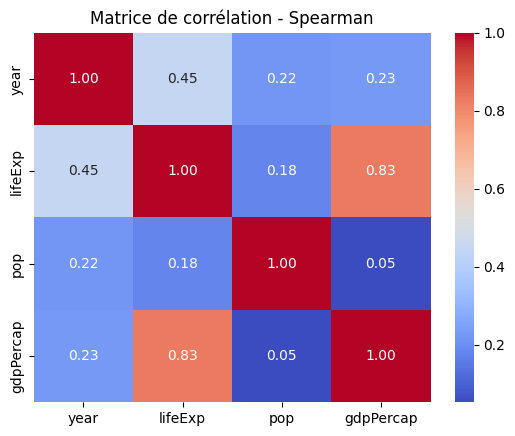

In [27]:
corr_matrix = df[['year', 'lifeExp', 'pop', 'gdpPercap']].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation - Spearman")
plt.show()

## Scatter matrix

In [28]:
import plotly.express as px

# filtered_df = df[df['continent'] == 'Europe']
# filtered_df = df[df['country'] == 'Honduras']
# filtered_df = filtered_df[['year', 'lifeExp', 'pop', 'gdpPercap']]

filtered_df = df[['year', 'lifeExp', 'pop', 'gdpPercap']]
fig = px.scatter_matrix(filtered_df)
# fig = px.scatter_matrix(df[df['year'] == 2007][['continent', 'year', 'lifeExp', 'pop', 'gdpPercap']], color='continent')
fig.show()

## Analyse bi-variée

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

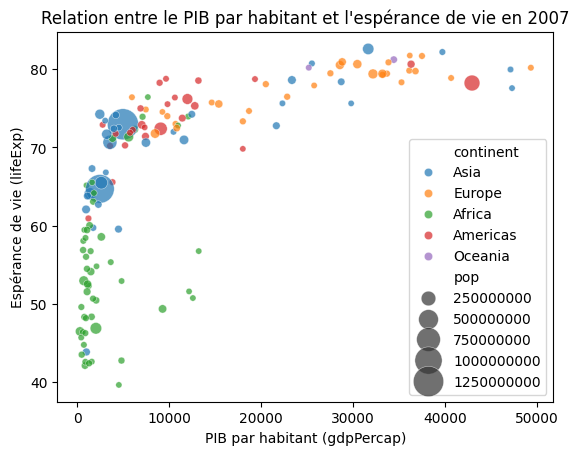

In [33]:
# Visualisation de la relation entre le PIB par habitant et l'espérance de vie en 2007
sns.scatterplot(data=df[df['year'] == 2007], x='gdpPercap', y='lifeExp', hue='continent', alpha=0.7, size='pop', sizes=(20, 500))
# sns.scatterplot(data=df, x='gdpPercap', y='lifeExp', hue='continent', alpha=0.7, size='pop', sizes=(20, 500))
plt.title("Relation entre le PIB par habitant et l'espérance de vie en 2007")
plt.xlabel("PIB par habitant (gdpPercap)")
plt.ylabel("Espérance de vie (lifeExp)")
plt.show()

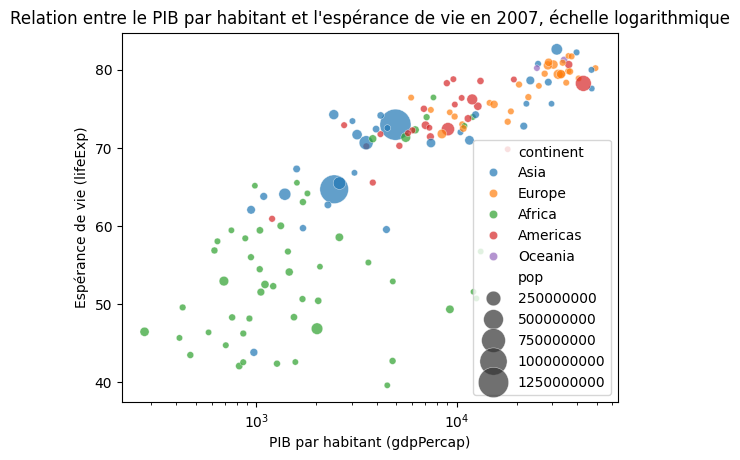

In [30]:
# Application d'une échelle logarithmique
sns.scatterplot(data=df[df['year'] == 2007], x='gdpPercap', y='lifeExp', hue='continent', alpha=0.7, size='pop', sizes=(20, 500))
plt.xscale('log')
plt.title("Relation entre le PIB par habitant et l'espérance de vie en 2007, échelle logarithmique")
plt.xlabel("PIB par habitant (gdpPercap)")
plt.ylabel("Espérance de vie (lifeExp)")
plt.show()

In [31]:
import plotly.express as px

fig = px.scatter(df[df['year'] == 2007], y="lifeExp", x="gdpPercap", color="continent", log_x=True, size="pop", size_max=60,
                 hover_name="country", height=600, width=1000, template="simple_white", 
                 color_discrete_sequence=px.colors.qualitative.G10,
                 title="Health vs Wealth 2007",
                 labels=dict(
                     continent="Continent", pop="Population",
                     gdpPercap="GDP per Capita (US$, price-adjusted)", 
                     lifeExp="Life Expectancy (years)"))

fig.update_layout(font_family="Rockwell",
                  legend=dict(orientation="h", title="", y=1.1, x=1, xanchor="right", yanchor="bottom"))
fig.update_xaxes(tickprefix="$", range=[2,5], dtick=1)
fig.update_yaxes(range=[30,90])
fig.add_hline((df["lifeExp"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.add_vline((df["gdpPercap"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.show()


In [32]:
import plotly.express as px

# Création du graphique animé
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,  # Échelle logarithmique pour le PIB par habitant
    size_max=60,
    title="Relation entre le PIB par habitant et l'espérance de vie (Animation par année)"
)

# Mise en page
fig.update_layout(
    xaxis_title="PIB par habitant (gdpPercap, échelle logarithmique)",
    yaxis_title="Espérance de vie (lifeExp)",
    legend_title="Continent",
    # yaxis_range=[20, 90],
    # xaxis_range=[-10e3, 60e3]
)

# Afficher le graphique
fig.show()


# Régression linéaire simple

|![image.png](images/regression_basics.png)|![image.png](images/regression%20_graph.png)|

In [34]:
# Modèle de régression entre l'année et l'espérance de vie

# Filtrer les données pour la France
france_df = df[df['country'] == 'France']

# Sélectionner les features et la target
X = france_df[['year']] # Feature
X

,year
528,1952
529,1957
530,1962
531,1967
532,1972
533,1977
534,1982
535,1987
536,1992
537,1997


In [36]:
y = france_df['lifeExp'] # Target
y

528    67.410
529    68.930
530    70.510
531    71.550
532    72.380
533    73.830
534    74.890
535    76.340
536    77.460
537    78.640
538    79.590
539    80.657
Name: lifeExp, dtype: float64

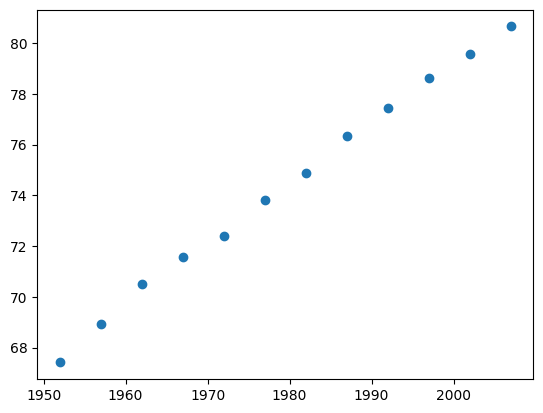

In [38]:

plt.scatter(X, y)


In [40]:
# Créer un modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Afficher les paramètres du modèle
slope, intercept = model.coef_[0], model.intercept_
print(f"Modèle de régression : y = {slope:.2f} * x + {intercept:.2f}")

Modèle de régression : y = 0.24 * x + -397.76


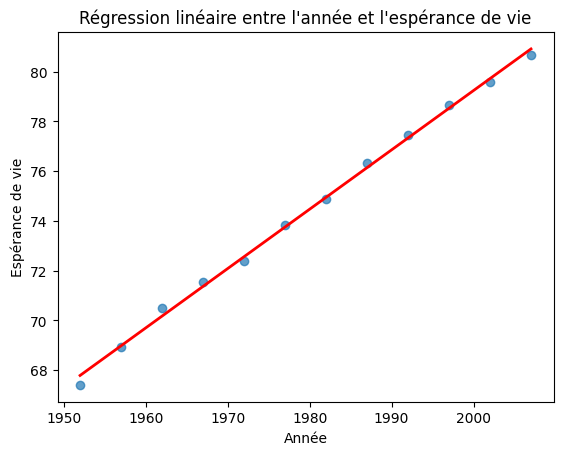

In [41]:
# Visualisation de la droite de régression
y_pred = model.predict(X)
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title("Régression linéaire entre l'année et l'espérance de vie")
plt.xlabel("Année")
plt.ylabel("Espérance de vie")
plt.show()

In [42]:
# Prédiction de l'espérance de vie en 2020
X_pred_2020 = pd.DataFrame([[2020]], columns=['year'])
y_pred_2020 = model.predict(X_pred_2020)
print(f"Prédiction de l'espérance de vie en 2020 : {y_pred_2020[0]:.2f}")

Prédiction de l'espérance de vie en 2020 : 84.01


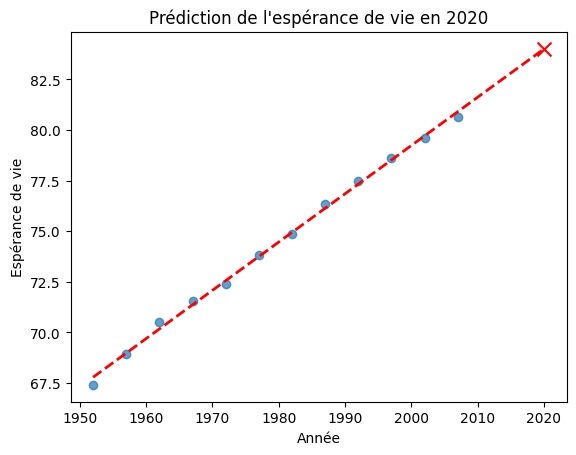

In [43]:
# Visualisation de la prédiction de l'espérance de vie en 2020
plt.scatter(X, y, alpha=0.7)

# Ajouter la prédiction
plt.scatter(X_pred_2020, y_pred_2020, color='red', marker='x', s=100)

# Ajouter la droite de régression
plt.plot(np.append(X, X_pred_2020), np.append(y_pred, y_pred_2020), color='red', linestyle='--', linewidth=2)

plt.title("Prédiction de l'espérance de vie en 2020")
plt.xlabel("Année")
plt.ylabel("Espérance de vie")
plt.show()

# Appliquer ces compétences sur des cas pratiques (données de santé, données financières, données de vente, etc.)

In [49]:
df_clients = pd.read_csv('data/clients.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_clients = pd.read_csv('data/clients.csv')
df_clients.columns

Index(['ClientID', 'Age', 'AnnualIncome', 'PurchaseAmount',
       'PurchaseFrequency', 'CustomerSatisfaction', 'Region', 'Ville',
       'Latitude', 'Longitude', 'Population', 'Altitude', 'DiscountApplied',
       'OrderMethod', 'PaymentMethod', 'TimeOfDay', 'ShippingCost'],
      dtype='object')

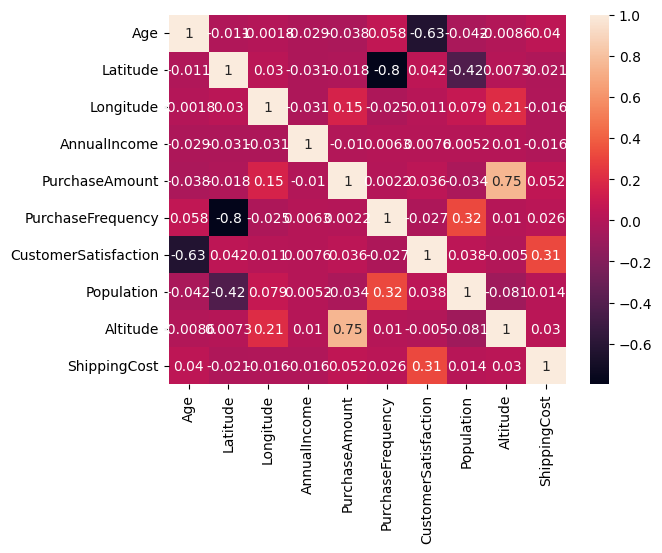

In [54]:
# Index(['ClientID', 'Age', 'AnnualIncome', 'PurchaseAmount',
#        'PurchaseFrequency', 'CustomerSatisfaction', 'Region', 'Ville',
#        'Latitude', 'Longitude', 'Population', 'Altitude', 'DiscountApplied',
#        'OrderMethod', 'PaymentMethod', 'TimeOfDay', 'ShippingCost'],
#       dtype='object')

quantitative_columns = ['Age', 'Latitude', 'Longitude', 'AnnualIncome', 'PurchaseAmount', 'PurchaseFrequency', 'CustomerSatisfaction', 'Population', 'Altitude', 'ShippingCost']

matric_corr = df_clients[quantitative_columns].corr()
sns.heatmap(matric_corr, annot=True)
plt.show()

In [57]:
df_clients.dropna(subset=[['Latitude','Longitude']], axis=0, inplace=True)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 1 but size of corresponding boolean axis is 2

In [55]:
import folium
map = folium.Map(location=[48.8566, 2.3522], zoom_start=12)
# add plots for each client 
for i in range(df_clients.shape[0]):
    folium.Marker([df_clients.loc[i, 'Latitude'], df_clients.loc[i, 'Longitude']], popup=df_clients.loc[i, 'ClientID']).add_to(map)
map

ValueError: Location values cannot contain NaNs.